In [1]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
train.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
train.shape

(891, 12)

In [4]:
test.shape

(418, 11)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [10]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

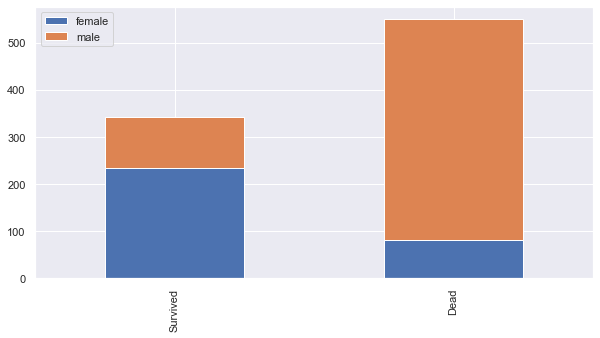

In [11]:
bar_chart('Sex')

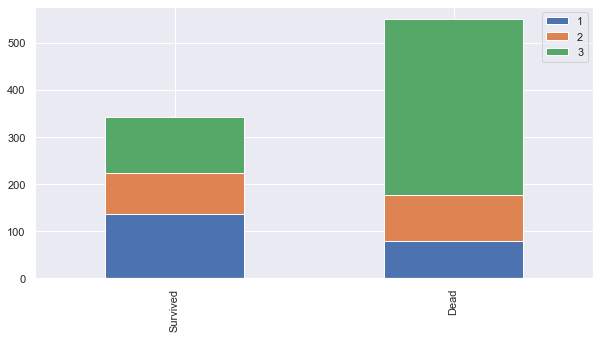

In [12]:
bar_chart('Pclass')

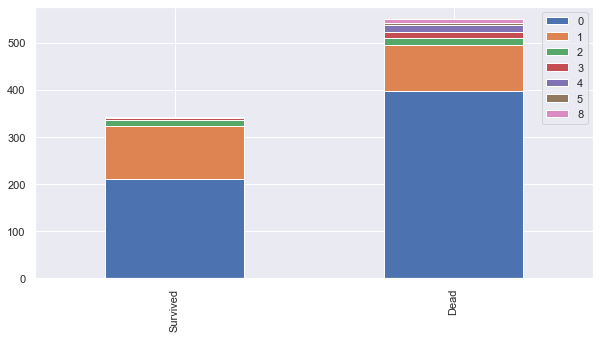

In [13]:
bar_chart('SibSp')

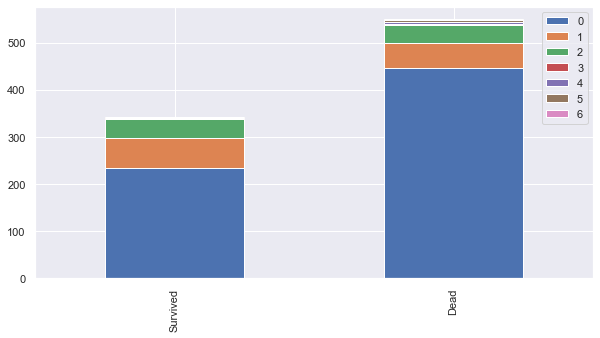

In [14]:
bar_chart('Parch')

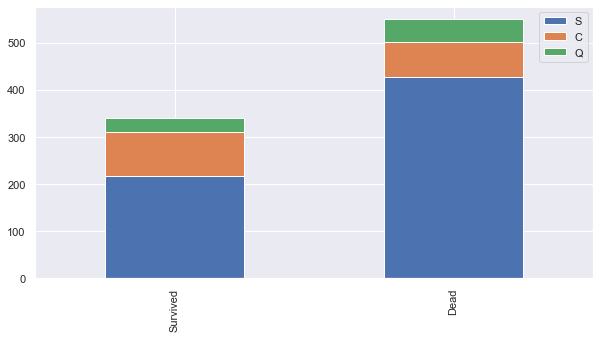

In [15]:
bar_chart('Embarked')

In [16]:
train_test_data = [train, test] 

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [17]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Mme           1
Sir           1
Jonkheer      1
Don           1
Ms            1
Countess      1
Capt          1
Lady          1
Name: Title, dtype: int64

In [18]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

In [19]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [20]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Title  
0      0         A/5 21171   7.2500   NaN        S      0  
1      0          PC 17599  71.2833   C85        C      2  
2      0  STON/O2. 3101282   7.9250   NaN        S      1  
3      0            113803  53.1000  C123        S      2  
4      0            373450   8.0500   NaN        S      0

In [21]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Title  
0  34.5      0      0   330911   7.8292   NaN        Q      0  
1  47.0      1      0   363272   7.0000   NaN        S      2  
2  62.0      0      0   240276   9.6875   NaN        Q      0  
3  27.0      0      0   315154   8.6625   NaN        S      0  
4  22.0      1      1  3101298  12.2875   NaN        S      2

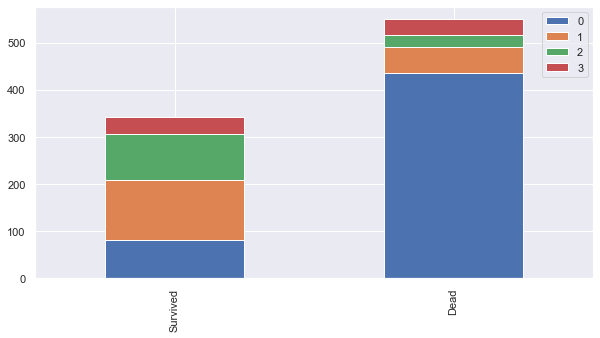

In [22]:
bar_chart('Title')

In [23]:
# delete unnecessary feature from dataset
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [24]:
train.head()

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  Title  
0         A/5 21171   7.2500   NaN        S      0  
1          PC 17599  71.2833   C85        C      2  
2  STON/O2. 3101282   7.9250   NaN        S      1  
3            113803  53.1000  C123        S      2  
4            373450   8.0500   NaN        S      0

In [25]:
test.head()

PassengerId  Pclass     Sex   Age  SibSp  Parch   Ticket     Fare Cabin  \
0          892       3    male  34.5      0      0   330911   7.8292   NaN   
1          893       3  female  47.0      1      0   363272   7.0000   NaN   
2          894       2    male  62.0      0      0   240276   9.6875   NaN   
3          895       3    male  27.0      0      0   315154   8.6625   NaN   
4          896       3  female  22.0      1      1  3101298  12.2875   NaN   

  Embarked  Title  
0        Q      0  
1        S      2  
2        Q      0  
3        S      0  
4        S      2

In [26]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

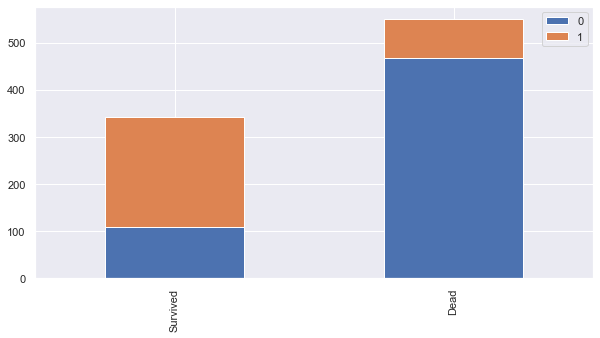

In [27]:
bar_chart('Sex')

In [28]:
train.head()

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch            Ticket  \
0            1         0       3    0  22.0      1      0         A/5 21171   
1            2         1       1    1  38.0      1      0          PC 17599   
2            3         1       3    1  26.0      0      0  STON/O2. 3101282   
3            4         1       1    1  35.0      1      0            113803   
4            5         0       3    0  35.0      0      0            373450   

      Fare Cabin Embarked  Title  
0   7.2500   NaN        S      0  
1  71.2833   C85        C      2  
2   7.9250   NaN        S      1  
3  53.1000  C123        S      2  
4   8.0500   NaN        S      0

In [29]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [30]:
train.groupby("Title")["Age"].transform("median")
train.head()

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch            Ticket  \
0            1         0       3    0  22.0      1      0         A/5 21171   
1            2         1       1    1  38.0      1      0          PC 17599   
2            3         1       3    1  26.0      0      0  STON/O2. 3101282   
3            4         1       1    1  35.0      1      0            113803   
4            5         0       3    0  35.0      0      0            373450   

      Fare Cabin Embarked  Title  
0   7.2500   NaN        S      0  
1  71.2833   C85        C      2  
2   7.9250   NaN        S      1  
3  53.1000  C123        S      2  
4   8.0500   NaN        S      0

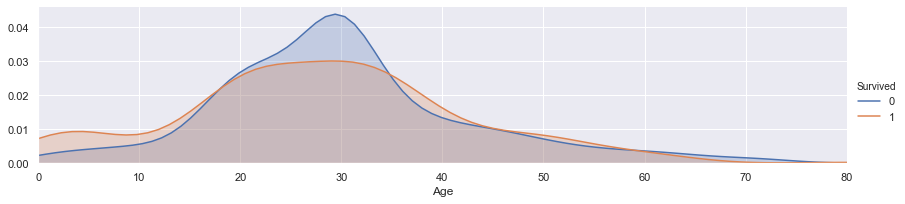

In [31]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.show()

(0, 20)

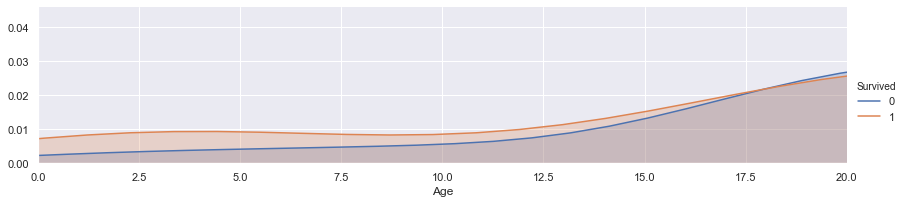

In [32]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

(20, 30)

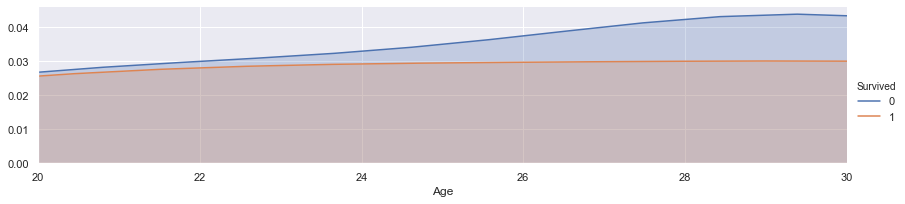

In [33]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20, 30)

(30, 40)

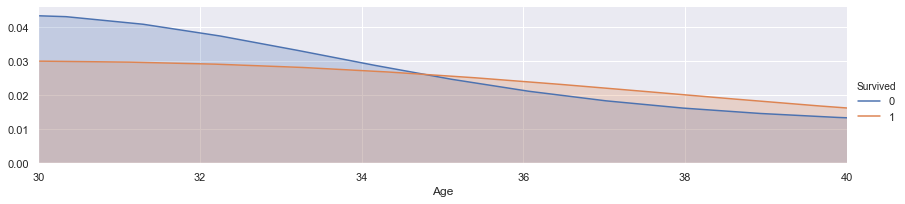

In [34]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(30, 40)

(40, 60)

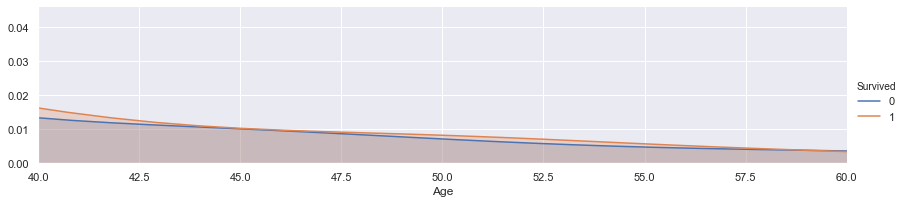

In [35]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          418 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [38]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [39]:
train.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    0  1.0      1      0         A/5 21171   
1            2         1       1    1  3.0      1      0          PC 17599   
2            3         1       3    1  1.0      0      0  STON/O2. 3101282   
3            4         1       1    1  2.0      1      0            113803   
4            5         0       3    0  2.0      0      0            373450   

      Fare Cabin Embarked  Title  
0   7.2500   NaN        S      0  
1  71.2833   C85        C      2  
2   7.9250   NaN        S      1  
3  53.1000  C123        S      2  
4   8.0500   NaN        S      0

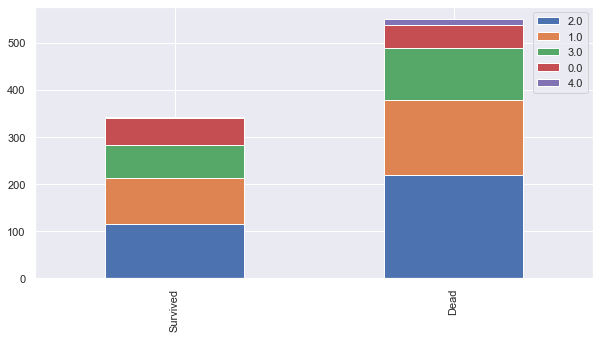

In [40]:
bar_chart('Age')

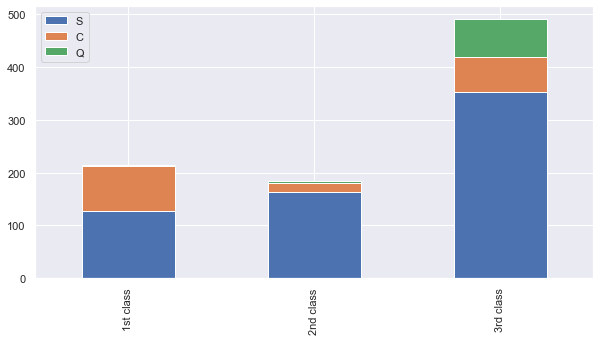

In [41]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [42]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [43]:
train.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    0  1.0      1      0         A/5 21171   
1            2         1       1    1  3.0      1      0          PC 17599   
2            3         1       3    1  1.0      0      0  STON/O2. 3101282   
3            4         1       1    1  2.0      1      0            113803   
4            5         0       3    0  2.0      0      0            373450   

      Fare Cabin Embarked  Title  
0   7.2500   NaN        S      0  
1  71.2833   C85        C      2  
2   7.9250   NaN        S      1  
3  53.1000  C123        S      2  
4   8.0500   NaN        S      0

In [44]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [45]:
# fill missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(5)

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    0  1.0      1      0         A/5 21171   
1            2         1       1    1  3.0      1      0          PC 17599   
2            3         1       3    1  1.0      0      0  STON/O2. 3101282   
3            4         1       1    1  2.0      1      0            113803   
4            5         0       3    0  2.0      0      0            373450   

      Fare Cabin  Embarked  Title  
0   7.2500   NaN         0      0  
1  71.2833   C85         1      2  
2   7.9250   NaN         0      1  
3  53.1000  C123         0      2  
4   8.0500   NaN         0      0

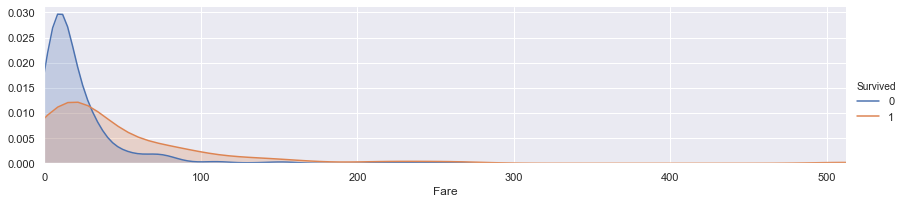

In [46]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.show()

(0, 20)

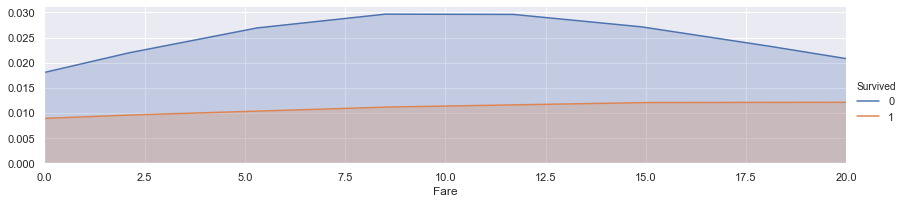

In [47]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

(0, 30)

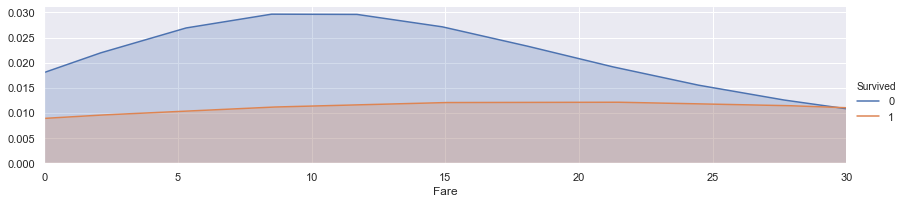

In [48]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)

In [49]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [50]:
train.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    0  1.0      1      0         A/5 21171   
1            2         1       1    1  3.0      1      0          PC 17599   
2            3         1       3    1  1.0      0      0  STON/O2. 3101282   
3            4         1       1    1  2.0      1      0            113803   
4            5         0       3    0  2.0      0      0            373450   

   Fare Cabin  Embarked  Title  
0   0.0   NaN         0      0  
1   2.0   C85         1      2  
2   0.0   NaN         0      1  
3   2.0  C123         0      2  
4   0.0   NaN         0      0

In [51]:
train.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
C22 C26        3
F2             3
              ..
C91            1
A10            1
C50            1
E68            1
B50            1
Name: Cabin, Length: 147, dtype: int64

In [52]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

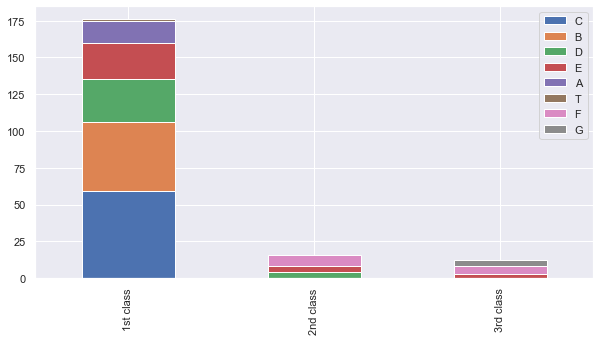

In [53]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [54]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [55]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [56]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0, 11.0)

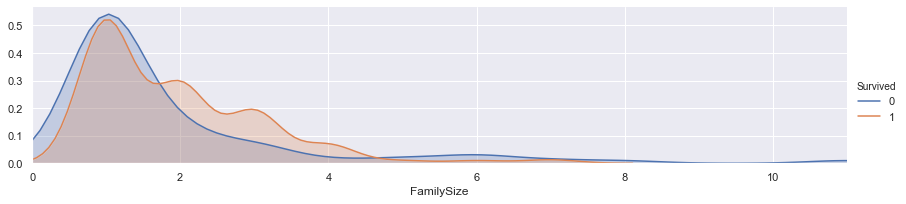

In [57]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [58]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [59]:
train.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    0  1.0      1      0         A/5 21171   
1            2         1       1    1  3.0      1      0          PC 17599   
2            3         1       3    1  1.0      0      0  STON/O2. 3101282   
3            4         1       1    1  2.0      1      0            113803   
4            5         0       3    0  2.0      0      0            373450   

   Fare  Cabin  Embarked  Title  FamilySize  
0   0.0    2.0         0      0         0.4  
1   2.0    0.8         1      2         0.4  
2   0.0    2.0         0      1         0.0  
3   2.0    0.8         0      2         0.4  
4   0.0    2.0         0      0         0.0

In [60]:
train.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    0  1.0      1      0         A/5 21171   
1            2         1       1    1  3.0      1      0          PC 17599   
2            3         1       3    1  1.0      0      0  STON/O2. 3101282   
3            4         1       1    1  2.0      1      0            113803   
4            5         0       3    0  2.0      0      0            373450   

   Fare  Cabin  Embarked  Title  FamilySize  
0   0.0    2.0         0      0         0.4  
1   2.0    0.8         1      2         0.4  
2   0.0    2.0         0      1         0.0  
3   2.0    0.8         0      2         0.4  
4   0.0    2.0         0      0         0.0

In [61]:
train.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    0  1.0      1      0         A/5 21171   
1            2         1       1    1  3.0      1      0          PC 17599   
2            3         1       3    1  1.0      0      0  STON/O2. 3101282   
3            4         1       1    1  2.0      1      0            113803   
4            5         0       3    0  2.0      0      0            373450   

   Fare  Cabin  Embarked  Title  FamilySize  
0   0.0    2.0         0      0         0.4  
1   2.0    0.8         1      2         0.4  
2   0.0    2.0         0      1         0.0  
3   2.0    0.8         0      2         0.4  
4   0.0    2.0         0      0         0.0

In [62]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [63]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [64]:
train_data.head()

Pclass  Sex  Age  Fare  Cabin  Embarked  Title  FamilySize
0       3    0  1.0   0.0    2.0         0      0         0.4
1       1    1  3.0   2.0    0.8         1      2         0.4
2       3    1  1.0   0.0    2.0         0      1         0.0
3       1    1  2.0   2.0    0.8         0      2         0.4
4       3    0  2.0   0.0    2.0         0      0         0.0

In [65]:
# Importing Classifier Modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import numpy as np

In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null float64
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


In [71]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [72]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76666667 0.80898876 0.7752809  0.7752809  0.86516854 0.75280899
 0.83146067 0.82022472 0.74157303 0.78651685]


In [73]:
# decision tree Score
round(np.mean(score)*100, 2)

79.24

In [74]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76666667 0.85393258 0.80898876 0.7752809  0.88764045 0.76404494
 0.80898876 0.80898876 0.7752809  0.82022472]


In [75]:
# Random Forest used Scoring
round(np.mean(score)*100, 2)

80.7

In [77]:
clf = RandomForestClassifier(n_estimators=13)
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [78]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": prediction
})
submission.to_csv('submission.csv', index=False)

In [79]:
submission = pd.read_csv('submission.csv')
submission.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1